In [4]:
# The code was removed by DSX for sharing.

## Import our data

In [5]:
df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_97ff18b62fe74e0496a8cb3fe9eaa15b('USOpiatePredictions', 'opioids.csv'))
df_data_1.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [6]:
df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_97ff18b62fe74e0496a8cb3fe9eaa15b('USOpiatePredictions', 'overdoses.csv'))
df_data_2.head()

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [7]:
df_data_3 = pd.read_csv(get_object_storage_file_with_credentials_97ff18b62fe74e0496a8cb3fe9eaa15b('USOpiatePredictions', 'prescriber-info.csv'))
df_data_3.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


## Exploration and Initial Preprocessing

In [8]:
# Let's start out by removing the ',' from our numbers in the Deaths and Population columns so that we can use them as integers
df_data_2['Deaths'] = df_data_2['Deaths'].str.replace(',', '')
df_data_2['Deaths'] = df_data_2['Deaths'].astype(int)

In [9]:
df_data_2['Population'] = df_data_2['Population'].str.replace(',', '')
df_data_2['Population'] = df_data_2['Population'].astype(int)

In [10]:
#Adding an additional column where we see the deaths per capita per each state
df_data_2['Deaths/Population'] = (df_data_2['Deaths']/df_data_2['Population'])

In [11]:
#Let's check to see that it worked!
df_data_2.head()

,State,Population,Deaths,Abbrev,Deaths/Population
0,Alabama,4833722,723,AL,0.000150
1,Alaska,735132,124,AK,0.000169
2,Arizona,6626624,1211,AZ,0.000183
3,Arkansas,2959373,356,AR,0.000120
4,California,38332521,4521,CA,0.000118


In [12]:
#Use pixiedust to visualize our initial exploration.
import pixiedust

Pixiedust database opened successfully



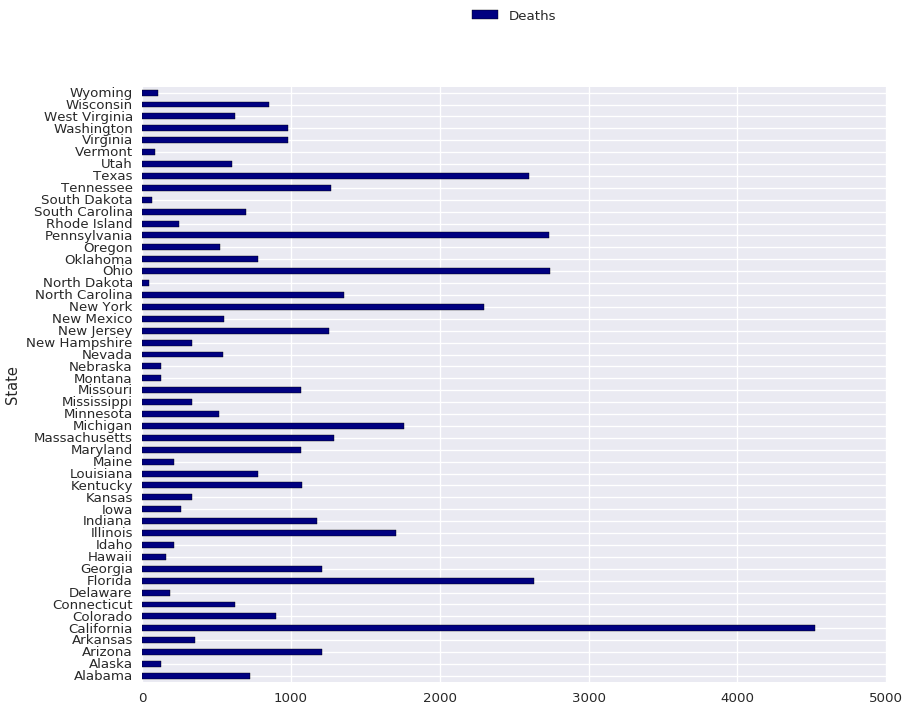

In [13]:
#How many opioid deaths by U.S. state?
display(df_data_2)

In [14]:
#It definitely looks like California has a great deal more deaths than any other state. 
#Let's remember, however, California is a huge state with a matching population. Because of this we need to take a look at the values of deaths per capita.


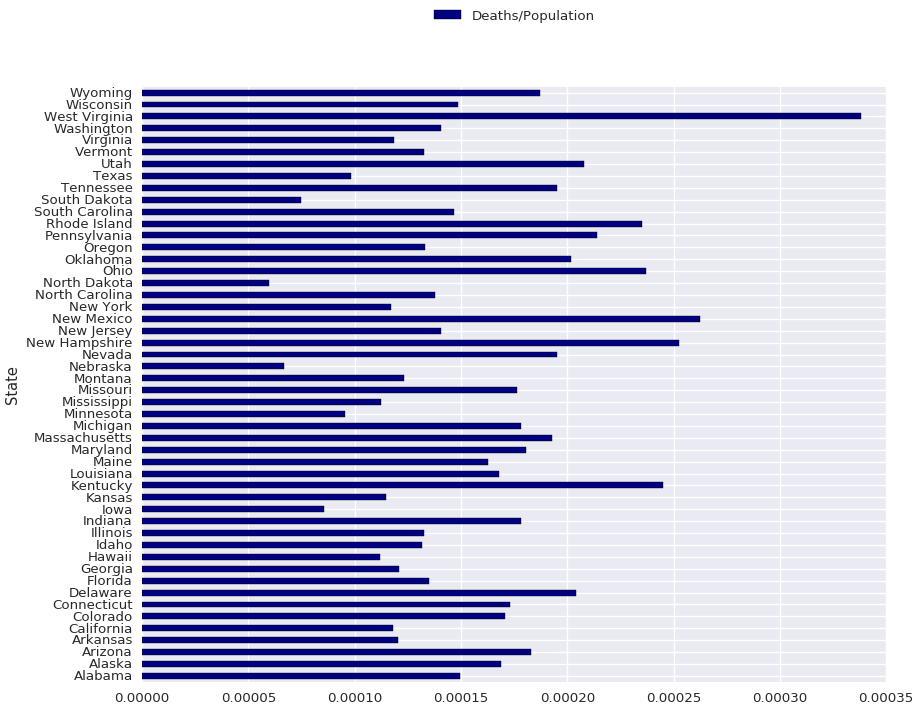

In [15]:
#What about deaths (% of population) by U.S. State?
display(df_data_2)

In [16]:
#We can see that West Virginia, New Mexico, New Hampshire, Ohio, Kentucky and Delaware stand out. 

In [17]:
#Let's check this out with a map. (I used google maps. To do this, create an API and enable JavaScript and GeoCoding. Then use your API key under 'Options'.)
display(df_data_2)

In [18]:
#Let's move onto exploring our other dataset.
df_data_3.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [19]:
#We seem to have a great deal of prescriptions as well as physicians' gender, state, speciality, whether they are an opioid prescriber or not and unique ID.
df_data_3.count()

NPI                               25000
Gender                            25000
State                             25000
Credentials                       24237
Specialty                         25000
ABILIFY                           25000
ACETAMINOPHEN.CODEINE             25000
ACYCLOVIR                         25000
ADVAIR.DISKUS                     25000
AGGRENOX                          25000
ALENDRONATE.SODIUM                25000
ALLOPURINOL                       25000
ALPRAZOLAM                        25000
AMIODARONE.HCL                    25000
AMITRIPTYLINE.HCL                 25000
AMLODIPINE.BESYLATE               25000
AMLODIPINE.BESYLATE.BENAZEPRIL    25000
AMOXICILLIN                       25000
AMOX.TR.POTASSIUM.CLAVULANATE     25000
AMPHETAMINE.SALT.COMBO            25000
ATENOLOL                          25000
ATORVASTATIN.CALCIUM              25000
AVODART                           25000
AZITHROMYCIN                      25000
BACLOFEN                          25000


In [20]:
#Let's take a look at the states. Why are there more than 50 states?
df_data_3.State.unique()

array(['TX', 'AL', 'NY', 'AZ', 'NV', 'PA', 'NH', 'WI', 'PR', 'CO', 'OH',
       'MA', 'CT', 'FL', 'MN', 'UT', 'IA', 'IL', 'MT', 'IN', 'VA', 'CA',
       'OR', 'NE', 'MI', 'NM', 'TN', 'KS', 'LA', 'MD', 'MO', 'AR', 'NC',
       'NJ', 'SC', 'WY', 'ME', 'OK', 'ND', 'KY', 'GA', 'DE', 'WA', 'RI',
       'WV', 'AK', 'ID', 'VT', 'HI', 'MS', 'DC', 'SD', 'AE', 'ZZ', 'GU',
       'AA', 'VI'], dtype=object)

In [21]:
#Compare to df_data_2.
df_data_2.Abbrev.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [22]:
#Clean up states and make the dataset state list equal.
#I checked the list of US state abbreviations and did not recognize PR, AE, ZZ, GU, AA or VI. After checking I learned that PR is Puerto Rico, GU is Guam and VI is Virgin Islands.
#Though I identified 3 of the 6 unknowns, I'll remove all of them as dataset 2 does not have data regarding PR, GU or VI.
df_data_3 = df_data_3[df_data_3.State != 'AE']
df_data_3 = df_data_3[df_data_3.State != 'ZZ']
df_data_3 = df_data_3[df_data_3.State != 'AA']
df_data_3 = df_data_3[df_data_3.State != 'PR']
df_data_3 = df_data_3[df_data_3.State != 'GU']
df_data_3 = df_data_3[df_data_3.State != 'VI']

In [23]:
#Make sure it worked!
df_data_3.State.unique()

array(['TX', 'AL', 'NY', 'AZ', 'NV', 'PA', 'NH', 'WI', 'CO', 'OH', 'MA',
       'CT', 'FL', 'MN', 'UT', 'IA', 'IL', 'MT', 'IN', 'VA', 'CA', 'OR',
       'NE', 'MI', 'NM', 'TN', 'KS', 'LA', 'MD', 'MO', 'AR', 'NC', 'NJ',
       'SC', 'WY', 'ME', 'OK', 'ND', 'KY', 'GA', 'DE', 'WA', 'RI', 'WV',
       'AK', 'ID', 'VT', 'HI', 'MS', 'DC', 'SD'], dtype=object)

In [24]:
#Check out how many credentials there are.
df_data_3.Credentials.unique()

array(['DDS', 'MD', 'M.D.', 'DO', 'RN, MSN, ANP-BC', 'O.D.', nan, 'D.D.S.',
       'ACNP', 'DPM', 'PAC', 'A.R.N.P.', 'MSN, APRN, BC', 'D.O.', 'M.D,',
       'APRN', 'PA-C', 'CNM', 'RN CNP', 'DDS MS', 'DNP, APRN-BC, FNP',
       'PHARM D.', 'CRNP', 'ARNP', 'D.D.S', 'DPM MD', 'FNP', 'NP', 'DMD',
       'PA', 'MPT', 'D.M.D.', 'APRN BC FNP', 'DMD,FAGD', 'MD,MPH',
       'BDS,  DDS', 'D.D.S., F.A.G.D.', 'DDS, MD', 'PMH, CNP/CNS', 'P.A.',
       'M.D', 'D.O., MPH & TM', 'M.D., PH.D.', 'RPA-C', 'MD FACOG',
       'F.N.P.', 'D.O', 'ANP', 'FNP-C', 'D.M.D', 'D.P.M.', 'OD', 'O. D.',
       'CNS', 'MS, APRN, FNP-C', 'MD MPH', 'NP-C', 'PHARM D', 'M.D.,',
       'MBBS', 'PHYSICIAN ASSISTANT', 'M.D. FCCP', 'MD.', 'CNP', 'DPT',
       'D.D.S, M.D.', 'APRN, BC', 'P.A.-C', 'M.D.P.A.', 'F.N.P.-C',
       'M. D.', 'CFNP', 'C.N.P', 'APN', 'D.D.S., A.P.C.', 'NP-C, MSN',
       'MD FACP', 'R.P.A.', 'N.P.', 'APRN, CNS', 'D.D.S., M.D.', 'PMHNP',
       'MD, PHD, ABFP', 'APNP', 'DMD, MD, PLLC', 'M.D., P.A.',
  

In [25]:
#Check out the specialties.
df_data_3.Specialty.unique()

array(['Dentist', 'General Surgery', 'General Practice',
       'Internal Medicine', 'Hematology/Oncology', 'Family Practice',
       'Nurse Practitioner', 'Optometry', 'Cardiology',
       'Obstetrics/Gynecology', 'Podiatry', 'Physician Assistant',
       'Diagnostic Radiology',
       'Student in an Organized Health Care Education/Training Program',
       'Neurology', 'Certified Nurse Midwife', 'Rheumatology',
       'Pharmacist', 'Urology', 'Cardiac Electrophysiology', 'Dermatology',
       'Emergency Medicine', 'Psychiatry & Neurology',
       'Infectious Disease', 'Psychiatry', 'Gastroenterology',
       'Ophthalmology', 'Thoracic Surgery', 'Oral Surgery (dentists only)',
       'Anesthesiology', 'Orthopedic Surgery', 'Otolaryngology',
       'Pulmonary Disease', 'Neuropsychiatry', 'Physical Therapist',
       'Pediatric Medicine', 'Physical Medicine and Rehabilitation',
       'Maxillofacial Surgery', 'Certified Clinical Nurse Specialist',
       'Preventive Medicine', 'Allergy/

In [26]:
#How much of the dataset is male vs female?
df_data_3.groupby('Gender').size() / df_data_3.groupby('Gender').size().sum()

Gender
F    0.378166
M    0.621834
dtype: float64

In [27]:
#How many prescribers in our dataset prescribe opioid drugs vs do not?
df_data_3.groupby('Opioid.Prescriber').size() / df_data_3.groupby('Opioid.Prescriber').size().sum()

Opioid.Prescriber
0    0.41282
1    0.58718
dtype: float64

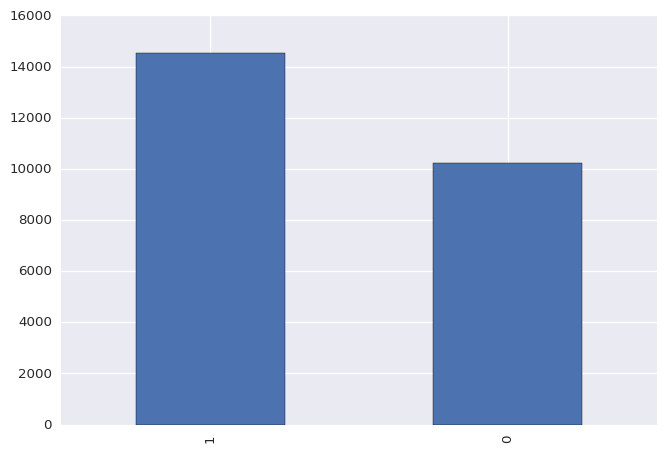

In [28]:
#Plot the opioid prescriber count vs non opioid prescriber count.
#The dataset has a slightly higher number of opioid prescribers.
pd.value_counts(df_data_3['Opioid.Prescriber']).plot.bar()

## Creating our Classifiers to Predict Opioid Prescribers

## Combination of Approaches: Kaggle and Indiana University

 - "Quick and Dirty" approach from Kaggle (https://www.kaggle.com/jiashenliu/quick-and-dirty-attempt-on-voting-classifier)
 - "Detecting Frequent Opioid Prescription" (https://inclass.kaggle.com/apryor6/detecting-frequent-opioid-prescription)
 - Indiana University: "Opiate prescription analysis using machine learning" (http://cgi.soic.indiana.edu/~arunsank/AML_report.pdf)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

In [30]:
#Find the shape of our data frame so that we know how to set our classifiers up.
print(df_data_3.shape)

(24759, 256)


In [31]:
#Mark opioid vs non opiod drugs in df_data_3 with use of df_data_1.

In [32]:
opioids = df_data_1 
name=opioids['Drug Name']
import re
new_name=name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns=df_data_3.columns
Abandoned_variables = set(columns).intersection(set(new_name))
Kept_variable=[]
for each in columns:
    if each in Abandoned_variables:
        pass
    else:
        Kept_variable.append(each)

In [33]:
#Look at our new shape.
df=df_data_3[Kept_variable]
print(df.shape)

(24759, 245)


In [34]:
df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [35]:
#Now let's remove the credentials column so that we can use the speciality column instead. 
#We will also remove the NPI column in order to trim our features down.

In [36]:
df = df.drop(df.columns[[0, 3]], axis=1) 
df.head()

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,M,TX,Dentist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,F,AL,General Surgery,0,0,0,0,0,0,134,...,0,0,0,0,0,0,0,0,35,1
2,F,NY,General Practice,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,M,AZ,Internal Medicine,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M,NV,Hematology/Oncology,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [37]:
#Let's now create our training and test data.
train,test = train_test_split(df,test_size=0.2,random_state=42)
print(train.shape)
print(test.shape)

(19807, 243)
(4952, 243)


In [38]:
#Now we convert our categorical columns.
Categorical_columns=['Gender','State','Specialty']

for col in Categorical_columns:
    train[col]=pd.factorize(train[col], sort=True)[0]
    test[col] =pd.factorize(test[col],sort=True)[0]

/usr/local/src/conda3_runtime.v21/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/src/conda3_runtime.v21/4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
#Set our features.
features=train.iloc[:,1:242] #make sure we only use the columns that we want as our features
features.head()

,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
11299,34,1,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17247,14,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14337,9,52,0,0,0,0,0,61,0,0,...,0,0,0,0,0,0,0,0,0,0
14452,35,85,0,0,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12366,9,66,0,0,0,0,0,0,0,0,...,0,0,0,19,0,0,0,0,0,0


In [41]:
#Import.
import sklearn
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [42]:
#Train our models. Let's use several classifiers so that we can check out which has the highest accuracy.
#Added bagging classifier to check for overfitting (along with cross validation).
#With 'Gender' included.
features=train.iloc[:,0:242] #Make sure to remove Opioid.Prescriber (our target)!
target = train['Opioid.Prescriber']
Name=[]
Accuracy=[]
model1=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=200,random_state=22)
model4=GradientBoostingClassifier(n_estimators=200)
model5=KNeighborsClassifier()
model6=DecisionTreeClassifier()
model7=LinearDiscriminantAnalysis()
model8=BaggingClassifier()
Ensembled_model=VotingClassifier(estimators=[('lr', model1), ('gn', model2), ('rf', model3),('gb',model4),('kn',model5),('dt',model6),('lda',model7), ('bc',model8)], voting='hard')
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.607866 of model Logistic Regression
Accuracy: 0.612056 of model Naive Bayes
Accuracy: 0.833039 of model Random Forest
Accuracy: 0.824507 of model Gradient Boosting
Accuracy: 0.778513 of model KNN
Accuracy: 0.778260 of model Decision Tree
Accuracy: 0.716665 of model LDA
Accuracy: 0.810572 of model Bagging Classifier
Accuracy: 0.834049 of model Ensemble


In [43]:
#Gender not included.
features=train.iloc[:,1:242] #Make sure to remove Opioid.Prescriber (our target)!
target = train['Opioid.Prescriber']
Name=[]
Accuracy=[]
model1=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=200,random_state=22)
model4=GradientBoostingClassifier(n_estimators=200)
model5=KNeighborsClassifier()
model6=DecisionTreeClassifier()
model7=LinearDiscriminantAnalysis()
model8=BaggingClassifier()
Ensembled_model=VotingClassifier(estimators=[('lr', model1), ('gn', model2), ('rf', model3),('gb',model4),('kn',model5),('dt',model6),('lda',model7), ('bc',model8)], voting='hard')
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.607866 of model Logistic Regression
Accuracy: 0.612157 of model Naive Bayes
Accuracy: 0.835109 of model Random Forest
Accuracy: 0.824456 of model Gradient Boosting
Accuracy: 0.778058 of model KNN
Accuracy: 0.781492 of model Decision Tree
Accuracy: 0.712727 of model LDA
Accuracy: 0.810269 of model Bagging Classifier
Accuracy: 0.833847 of model Ensemble


In [ ]:
#Looks like our highest accuracy score is 83.5% with Random Forest, followed by 83.3% with the Ensemble.

In [ ]:
#Overall, it seems our models are less accurate when 'Gender' is included, with the exception of our Ensemble which gets a fairly high accuracy at 83.4% accuracy.

In [44]:
#Let's check out our best models from our run without 'Gender'.
Name_2=[]
Accuracy_2=[]
Ensembled_model_3=VotingClassifier(estimators=[('rf', model3),('em',Ensembled_model)], voting='hard')
for model, label in zip([model3, model4,Ensembled_model_3, model8], ['Random Forest', 'Gradient Boosting', 'Ensemble', 'Bagging Classifier']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy_2.append(scores.mean())
    Name_2.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.835109 of model Random Forest
Accuracy: 0.824406 of model Gradient Boosting
Accuracy: 0.836624 of model Ensemble
Accuracy: 0.810067 of model Bagging Classifier


In [45]:
from sklearn.metrics import accuracy_score
classifers=[model3,model4,model8]
out_sample_accuracy=[]
Name_2=[]
for each in classifers:
    fit=each.fit(features,target)
    pred=fit.predict(test.iloc[:,1:242])
    accuracy=accuracy_score(test['Opioid.Prescriber'],pred)
    Name_2.append(each.__class__.__name__)
    out_sample_accuracy.append(accuracy)

### Evaluate

In [46]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_actu = test['Opioid.Prescriber']
confusion_matrix(y_actu, pred)

array([[1282,  769],
       [ 520, 2381]])

In [47]:
#Precision-Recall Curve
sklearn.metrics.precision_recall_curve(y_actu, pred, pos_label=None, sample_weight=None)

(array([ 0.58582391,  0.75587302,  1.        ]),
 array([ 1.        ,  0.82075147,  0.        ]),
 array([0, 1]))

In [48]:
#Precision-Recall Score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_actu, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.84


/usr/local/src/conda3_runtime.v21/4.1.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


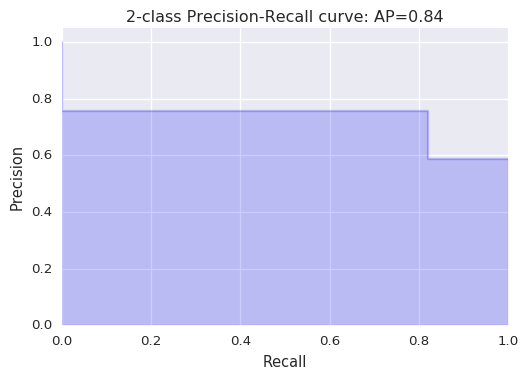

In [49]:
#Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_actu, pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
